# Aliasing

Let us introduce the problem of aliasing to finish off this lecture. We have also described this in the introductory video and slides on Moodle, so do look there as well to see this explained!

We generated a data stream 16 seconds long, sampled 16 times a second .... This means that we had 256 data points, and 16 samples are taken every second, so sample 0 is at t=0s, sample 1 as at t=1/16.s, sample 2 is at t=2/16.s, sample 16 is at t=16/16=1s.

The maximum frequency in our Fourier transform was 15.9375 Hz. But can we really measure frequencies that high if only taking one data reading every 1/16 of a second? Let's see what happens if we consider a sine-wave with a frequency of 15.9375 (so it should have almost 16 cycles in a second), and we take a point from this sine wave once every 1/16 of a second

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.signal

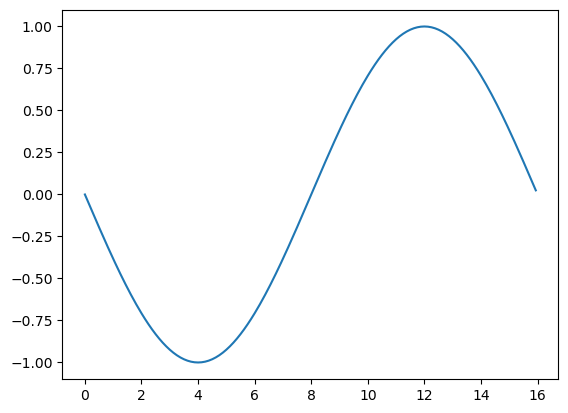

In [3]:
omega = 15.9375 * (2*np.pi)
sample_rate = 16
data_length = 256
times = np.arange(data_length) / sample_rate
sine_wave = np.sin(omega * times)

plt.plot(times,sine_wave)

Does this seem okay? Yes, it is a sine wave, but it's *supposed* to oscillate almost 16 times a second, not once every 16 seconds! **This effect is aliasing**. If you try to sample a time series with frequency content above the Nyquist frequency (8Hz in this case), that content will appear reduced in frequency. This is important with music (for example) where you want the sounds to sound like they should when played back!

In fact a sine wave of 31.9735 Hz or 47.9725 Hz or ... will all appear the same as this one when sampled at 16Hz. This is why sometimes Fourier transforms, instead of quoting frequencies above the Nyquist (8Hz to 16Hz in our case), quote negative frequencies (-8Hz to 8Hz). The content at -7Hz is *identical* to content at 15Hz according to this aliasing (and 15Hz content will appear as 1Hz content unless you are considering complex input).